# Task-3

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('bank.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df.shape

(4521, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='count'>

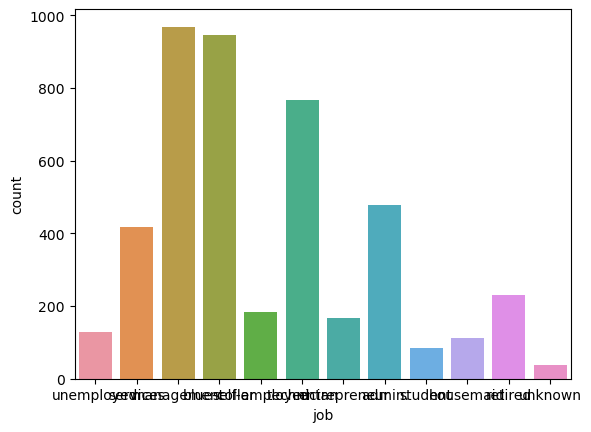

In [11]:
sns.countplot(x='job',data=df)

# Martial Status

In [12]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

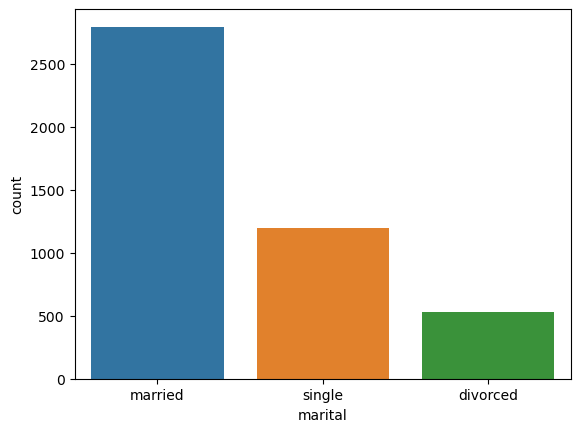

In [13]:
sns.countplot(x='marital',data=df)

# Education type of client

In [14]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

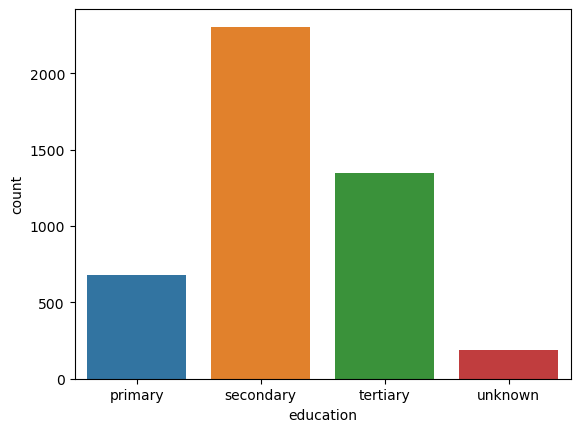

In [15]:
sns.countplot(x='education',data=df)

# Client with personal loan

In [17]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

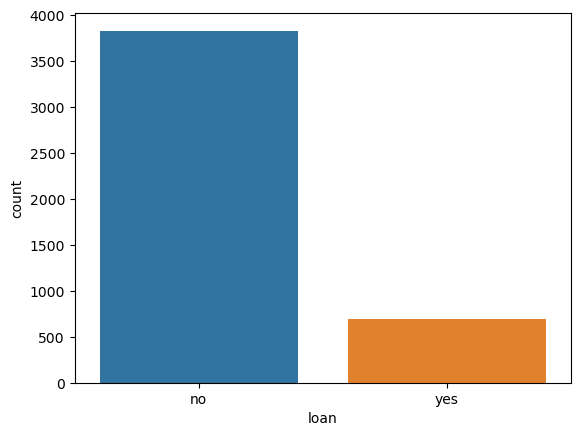

In [18]:
sns.countplot(x='loan',data=df)

# Client with housing loan

In [20]:

df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

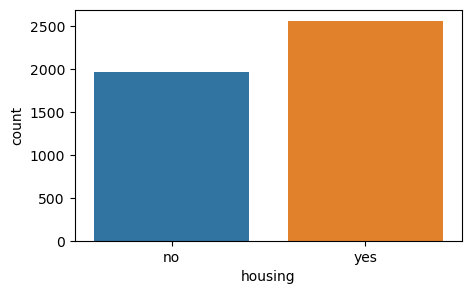

In [21]:
plt.figure(figsize = (5,3))
sns.countplot(x='housing',data=df)

# Campaign

In [22]:
df.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

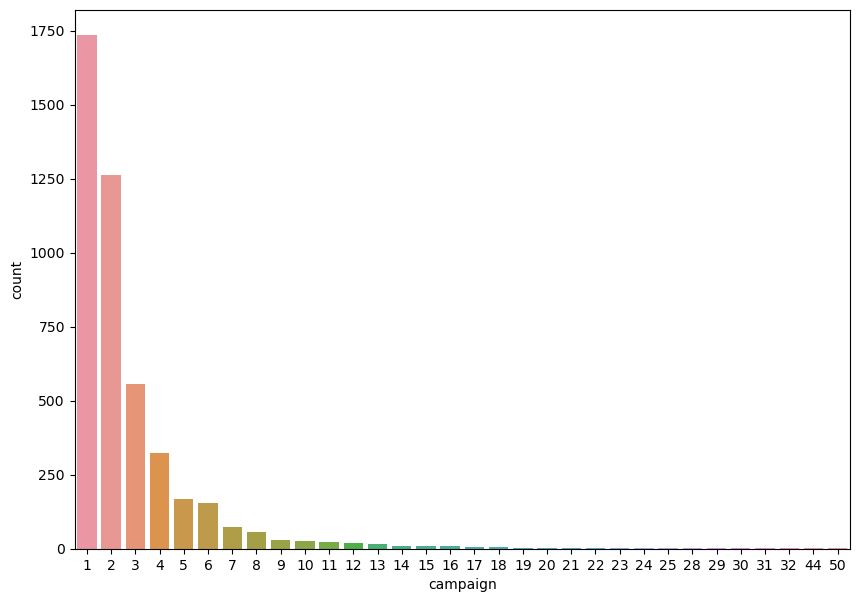

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='campaign',data=df)

# Age Distribution within the dataset

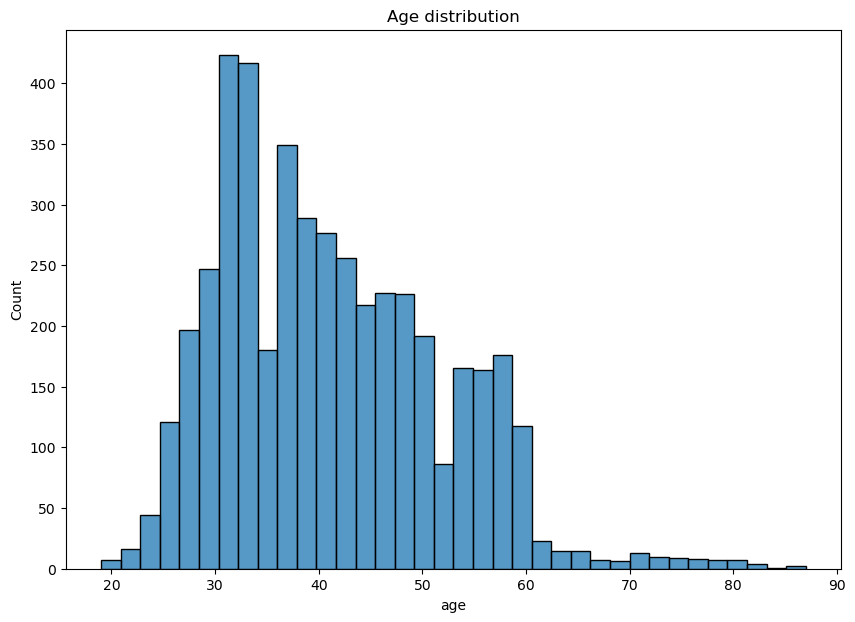

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(df['age'])
plt.title("Age distribution")
plt.show()

In [26]:
df['Income_group']=pd.cut(df['balance'],bins=[-15000,500,1500,72000],labels=['Low','Mid','High'])

In [27]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Income_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,High
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,High
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Mid
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Mid
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Low


<Axes: xlabel='Income_group', ylabel='count'>

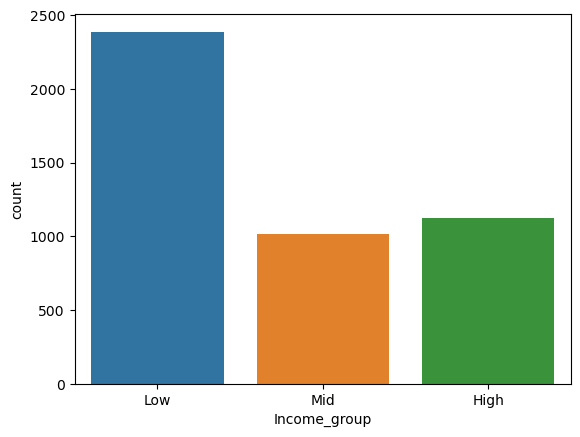

In [28]:
sns.countplot(x='Income_group',data=df)

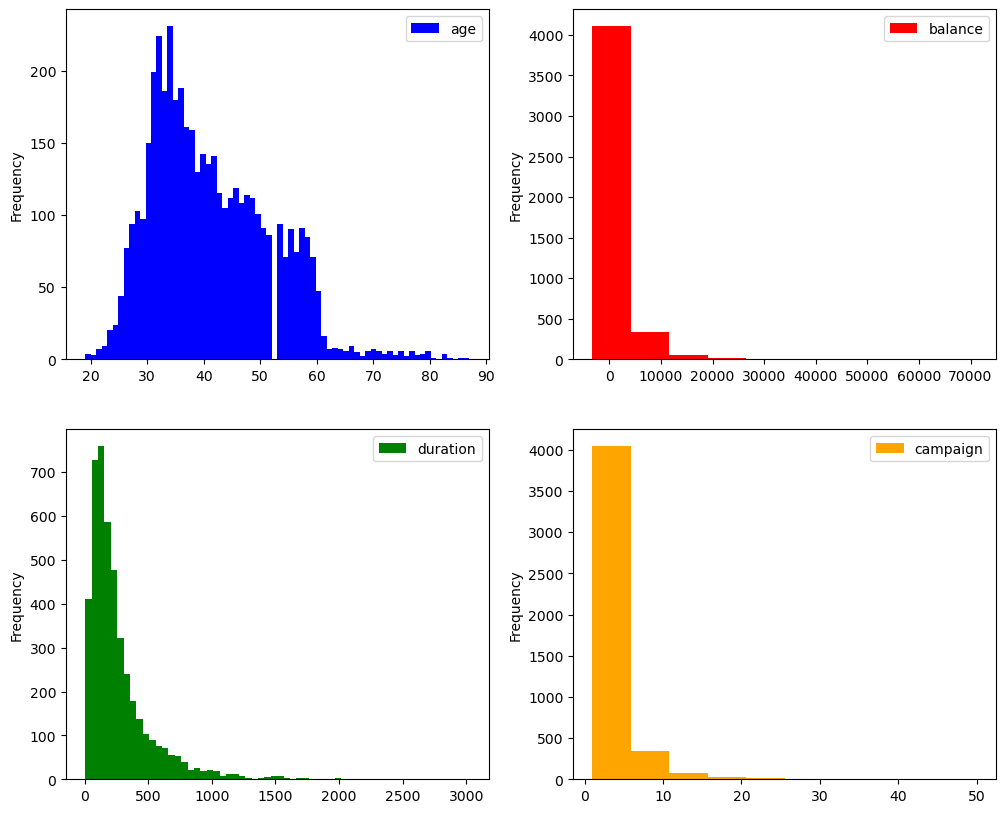

In [29]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10))
df.plot(kind = "hist",y = "age",bins = 70,color = "blue",ax = axes[0][0])
df.plot(kind = "hist",y = "balance",bins = 10,color = "red",ax = axes[0][1])
df.plot(kind = "hist",y = "duration",bins = 60,color = "green",ax = axes[1][0])
df.plot(kind = "hist",y = "campaign",bins = 10,color = "orange",ax = axes[1][1])
plt.show()

<Figure size 1600x900 with 0 Axes>

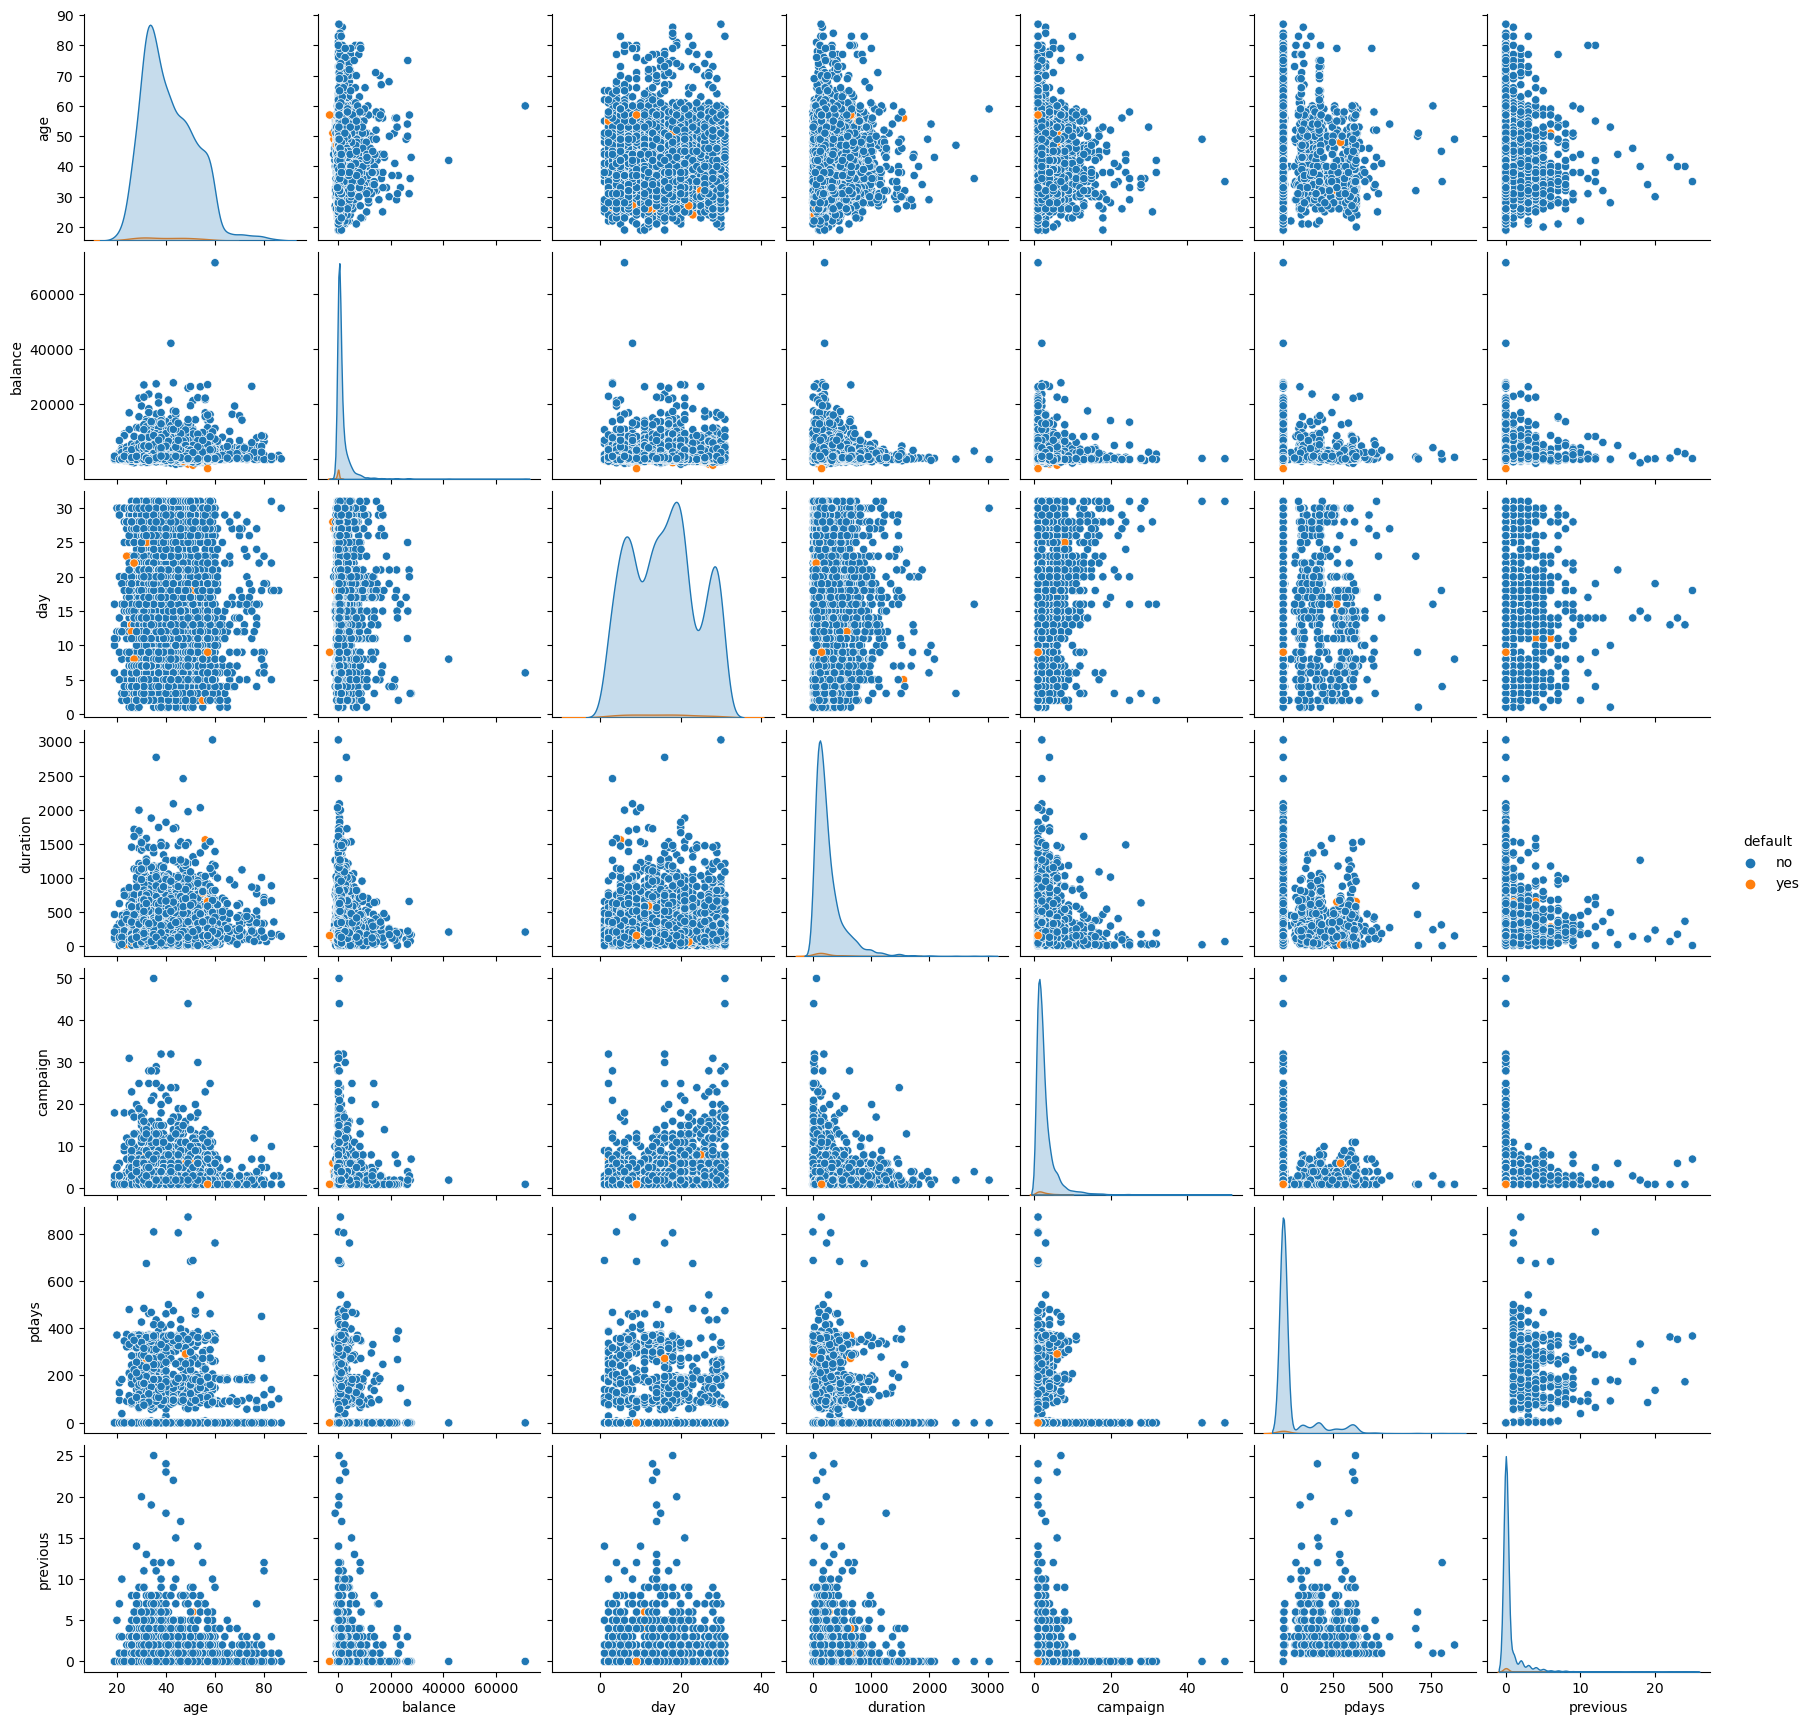

In [30]:
plt.figure(figsize = (16,9))
sns.pairplot(data = df,hue = "default")

In [31]:
df.drop(['pdays','previous','poutcome','y','Income_group'],axis=1 , inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["default"] = le.fit_transform(df["default"])
df["contact"] = le.fit_transform(df["contact"])
df["month"] = le.fit_transform(df["month"])
df["loan"] = le.fit_transform(df["loan"])
df["housing"] = le.fit_transform(df["housing"])

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,30,10,1,0,0,1787,0,0,0,19,10,79,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4
4,59,1,1,1,0,0,1,0,2,5,8,226,1


In [34]:
x=df.drop('default',axis=1)
y=df['default']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
dtc_pred = dtc.predict(x_test)

In [38]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       884
           1       0.06      0.05      0.05        21

    accuracy                           0.96       905
   macro avg       0.52      0.52      0.52       905
weighted avg       0.96      0.96      0.96       905



In [39]:
score=round(dtc.score(x_train,y_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


In [40]:
cm = confusion_matrix(dtc_pred,y_test)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[869  20]
 [ 15   1]]


## This Show that the decision tree classifier gives a very good percentage of accuracy